In [1]:
import cv2 as cv
from cmath import sqrt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

In [5]:
import os

lista = []
lista_nombres = []
directorio_base = 'img'

for directorio_actual, subdirectorios, archivos in os.walk(directorio_base):
    for name in archivos:
        lista.append(os.path.join(directorio_actual, name))
        lista_nombres.append(os.path.basename(directorio_actual))  # Obtener el nombre del directorio actual

print(lista_nombres)
print(lista)

['none', 'none', 'none', 'none', 'none', 'none', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'none', 'none', 'none', 'none', 'none', 'papel', 'papel', 'papel', 'papel', 'papel', 'none', 'none', 'none', 'none', 'none', 'papel', 'papel', 'papel', 'papel', 'papel', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'papel', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'piedra', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'tijeras', 'ti

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


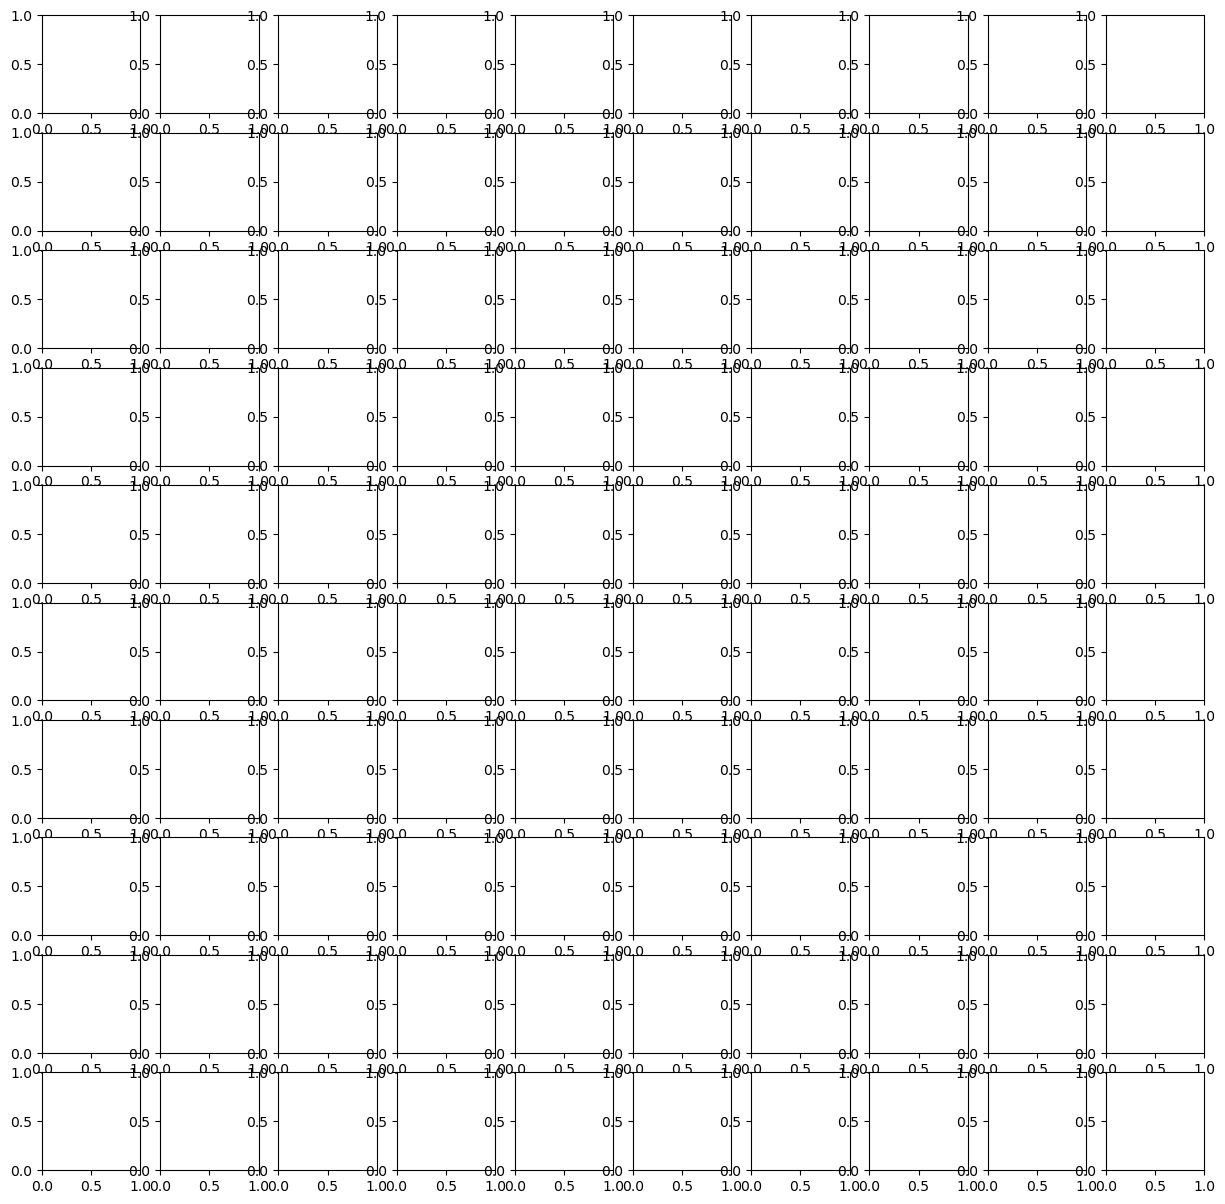

In [4]:
filas = 10
columnas = 10
lista_rois=[]
fig, axs = plt.subplots(filas, columnas, figsize=(15, 15))
for i, img_path in enumerate(lista):
    fila = i // columnas
    columna = i % columnas
    img1 = cv.imread(img_path)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gris = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    caras = face_cascade.detectMultiScale(gris, 2.3, 1)
    img2 = img1.copy()
    for (x,y,w,h) in caras:
        cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 4)
        roi = gris[y:y+h, x:x+w]
        lista_rois.append([roi,img_path])
        roi_color = img2[y:y+h, x:x+w]
    axs[fila, columna].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    axs[fila, columna].axis('off')
    axs[fila, columna].set_title(f'Imagen {i+1}')
plt.tight_layout()
plt.show()